         Country  Year  Coffee Consumption (kg per capita per year)  \
2290   Country_1  2023                                     9.534570   
225    Country_2  2023                                     6.531126   
1322   Country_3  2023                                     7.872856   
1216   Country_4  2023                                     3.812431   
283    Country_5  2023                                     9.759405   
1676   Country_6  2023                                     8.875381   
99     Country_7  2023                                     6.550550   
1034   Country_8  2023                                     7.255146   
1492   Country_9  2023                                     9.860390   
1247  Country_10  2023                                     3.463101   
1077  Country_11  2023                                     2.243379   
120   Country_12  2023                                     2.257723   
2403  Country_13  2023                                     2.211636   
321   

Text(0.5, 0, 'Produto Interno Bruto ($ per capita)')

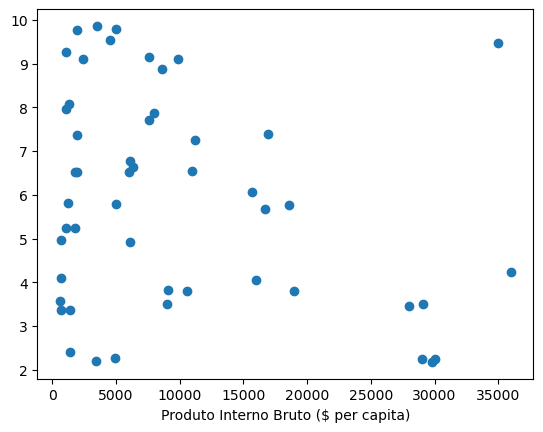

In [43]:
import pandas as pd

# Load the dataset into a DataFrame
dfCountries = pd.read_csv('Dados/countries of the world.csv')

# Display the first few rows of the DataFrame
dfCountries.head()

dfCoffee = pd.read_csv('Dados/worldwide_coffee_habits.csv')
dfCoffee.head()
# Show the first 3 columns of dfCountries
#print(dfCountries.iloc[:, :3])
# Create a new column in dfCoffee to extract the country number
dfCoffee['Country_nr'] = dfCoffee['Country'].str.extract('(\d+)').astype(int)
#print(dfCoffee[['Country_nr', 'Country']])

# Filter dfCoffee to keep only the latest year for each country
latest_year_dfCoffee = dfCoffee.loc[dfCoffee.groupby('Country_nr')['Year'].idxmax()]
print(latest_year_dfCoffee)
# Merge the datasets based on the index of dfCountries and the extracted country number in dfCoffee
# Note to teacher: here we assume the country numbers are unique and match the indices of dfCountries
merged_df = pd.merge(dfCountries.reset_index(), latest_year_dfCoffee, left_index=True, right_on='Country_nr', how='inner')
#TODO: Here the year is not the latest, but the maximum year. This is a mistake in the code. The correct code is:

# Display the merged DataFrame
print(merged_df[['Country_x', 'Year', 'Coffee Consumption (kg per capita per year)']])

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('Dados/merged_countries_coffee.csv', index=True)

# Compare the Column GDP with the column Coffee Consumption and show both in a scatter plot
import matplotlib.pyplot as plt
plt.scatter(merged_df['GDP ($ per capita)'], merged_df['Coffee Consumption (kg per capita per year)'])
plt.xlabel('Produto Interno Bruto ($ per capita)')

In [35]:

dfCoffee = pd.read_csv('Dados/worldwide_coffee_habits.csv')
dfCoffee.head()

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


In [36]:
#